In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import model_selection

from keras.layers import Dense
from keras.models import Sequential
from keras.utils.np_utils import to_categorical

from sklearn.datasets import load_boston

%matplotlib inline

In [2]:
attributes = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
target_variable = ['MEDV']

a) Učitati podatke iz datoteke `boston.csv` za problem regresije. Prikazati referentne statistike za atribute
koristeći `pandas` metod `describe`.

In [5]:
df = pd.read_csv("boston.csv")

b) Učitane podatke razdvojiti u dva podskupa, $X$ gde se nalaze svi atributi bez ciljne promenljive `MEDV`, i $y$ gde se
nalazi ciljna promenljiva `MEDV`. Dozvoljeno je koristiti sve dostupne bibliotečke funkcije.

In [6]:
x = df.drop(axis=1, columns=target_variable)
y = df[target_variable]

c) Podeliti podatke na skup za obučavanje i validaciju u razmeri 3:1. 

In [7]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y, train_size=0.75, random_state=42)
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
182,0.09103,0.0,2.46,0.0,0.4880,7.155,92.2,2.7006,3.0,193.0,17.8,394.12,4.82
155,3.53501,0.0,19.58,1.0,0.8710,6.152,82.6,1.7455,5.0,403.0,14.7,88.01,15.02
280,0.03578,20.0,3.33,0.0,0.4429,7.820,64.5,4.6947,5.0,216.0,14.9,387.31,3.76
126,0.38735,0.0,25.65,0.0,0.5810,5.613,95.6,1.7572,2.0,188.0,19.1,359.29,27.26
329,0.06724,0.0,3.24,0.0,0.4600,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34


d) Izvršiti standardizaciju podataka.

In [8]:
x_train = (x_train - x_train.mean()) / x_train.std()
x_test = (x_test - x_test.mean()) / x_test.std()
y_train = (y_train - y_train.mean()) / y_train.std()
y_test = (y_test - y_test.mean()) / y_test.std()

e) Napraviti potpuno povezano neuronsku mrežu koja ima jedan skriveni sloj sa 32 neurona. Skrivenom sloju postaviti `ReLU` aktivaciju. Obratiti pažnju na dimenzije ulaza i izlaza neuronske mreže.

In [9]:
model = Sequential([
                    Dense(32, activation='relu', input_dim=x_train.shape[1]),
                    Dense(1)
])

f) Izvršiti obučavanje prethodno definisane mreže na 10 epoha sa veličinom podskupa 32. Kao grešku koristiti srednje-kvadratnu grešku, ostale parametre odabrati proizvoljno. Pratiti i srednju-apsolutnu grešku. Kao podatke za validaciju postaviti podatke iz validacionog skupa.

In [10]:
model.compile(optimizer='adam',
              loss='mae',
              metrics=['mae','mse']              
)

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test,y_test))

Epoch 1/10
12/12 [==============================] - 1s 22ms/step - loss: 0.7231 - mae: 0.7231 - mse: 1.0820 - val_loss: 0.6246 - val_mae: 0.6246 - val_mse: 0.7857
Epoch 2/10
12/12 [==============================] - 0s 4ms/step - loss: 0.6519 - mae: 0.6519 - mse: 0.9083 - val_loss: 0.5662 - val_mae: 0.5662 - val_mse: 0.6705
Epoch 3/10
12/12 [==============================] - 0s 4ms/step - loss: 0.5907 - mae: 0.5907 - mse: 0.7645 - val_loss: 0.5188 - val_mae: 0.5188 - val_mse: 0.5799
Epoch 4/10
12/12 [==============================] - 0s 7ms/step - loss: 0.5332 - mae: 0.5332 - mse: 0.6517 - val_loss: 0.4773 - val_mae: 0.4773 - val_mse: 0.5033
Epoch 5/10
12/12 [==============================] - 0s 5ms/step - loss: 0.4859 - mae: 0.4859 - mse: 0.5595 - val_loss: 0.4442 - val_mae: 0.4442 - val_mse: 0.4472
Epoch 6/10
12/12 [==============================] - 0s 5ms/step - loss: 0.4461 - mae: 0.4461 - mse: 0.4911 - val_loss: 0.4203 - val_mae: 0.4203 - val_mse: 0.4113
Epoch 7/10
12/12 [=========

g) Nacrtati na istoj slici kako se menjala srednja-apsolutna greška kroz epohe na skupovima za obučavanje i validaciju. Označiti u legendi šta označava koja linija.

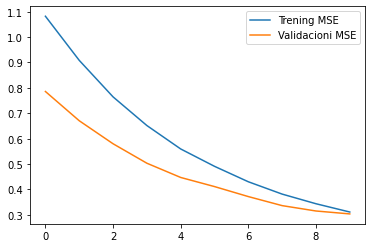

In [11]:
plt.plot(history.epoch, history.history['mse'])
plt.plot(history.epoch, history.history['val_mse'])
plt.legend(['Trening MSE', 'Validacioni MSE'])
plt.show()